# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per USD 10000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in USD 1000's

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
# Importing data

data = pd.read_csv('../data/boston_data.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
print("dimension of data: {}".format(data.shape))

dimension of data: (404, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [8]:
# sns.pairplot(data)

#### Outliers

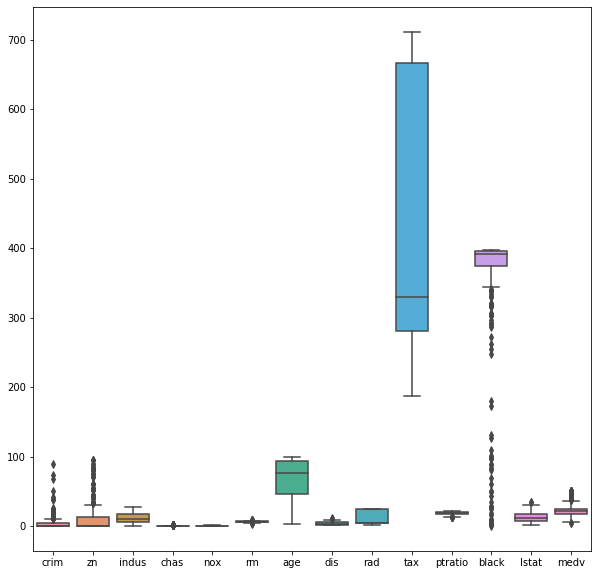

In [9]:
# Idenitfying outliers:

sns.boxplot(data=data)
plt.show()

In [10]:
"""
We can see outliers in crim, zn, chas, rm, dis, ptratio, black, lstat, medv columns.
"""

'\nWe can see outliers in crim, zn, chas, rm, dis, ptratio, black, lstat, medv columns.\n'

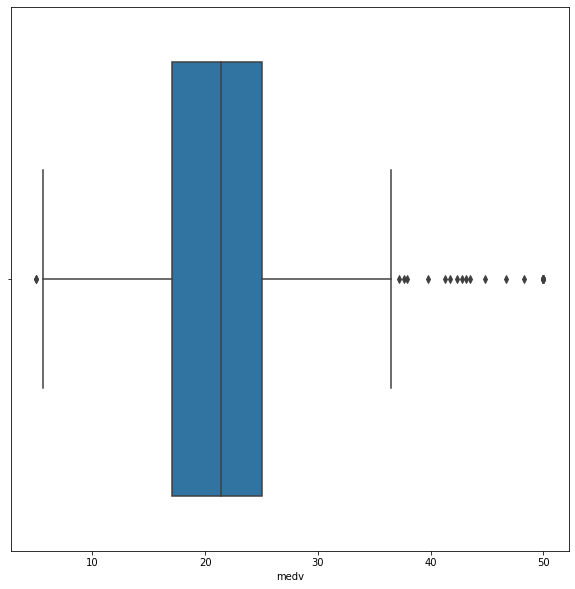

In [11]:
# Checking closer the target column:

sns.boxplot(x=data['medv'])
plt.show()

In [12]:
# Calculating IQR for all datatset

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64


In [13]:
# Total number of outliers:

((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).sum()

crim       42
zn         49
indus       0
chas       28
nox         0
rm         21
age         0
dis         5
rad         0
tax         0
ptratio    12
black      61
lstat       2
medv       27
dtype: int64

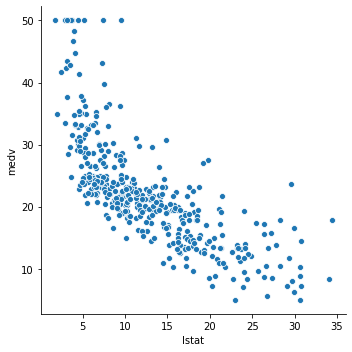

In [14]:
sns.relplot(x='lstat', y='medv', data=data)
plt.show()

In [15]:
# Cleaning outliers:

boston_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
print("dimension of data without outliers: {}".format(boston_no_outliers.shape)) 

dimension of data without outliers: (228, 14)


##### Other ways to identify outliers

In [17]:
# another way LocalOutlierFactor

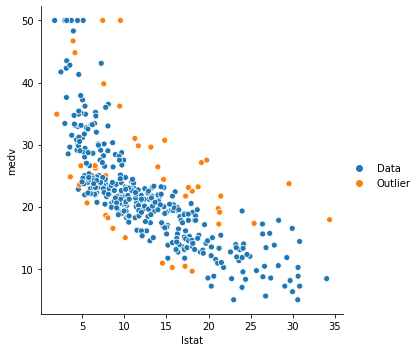

In [18]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10, contamination=.1)
lof_pred = clf.fit_predict(data[['lstat','medv']])

np.where(lof_pred<0,'Outlier','Data')
outlier_pred=pd.Series(lof_pred).replace([-1,1],['Outlier','Data'])
sns.relplot(x='lstat', y='medv', hue=outlier_pred, data=data)
plt.show()

In [19]:
# Another way EllipticEnvelope

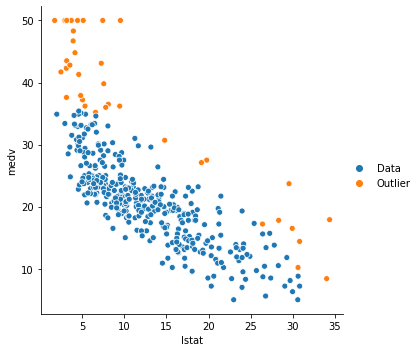

In [20]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1)
env_pred = clf.fit_predict(data[['lstat','medv']])

sns.relplot(x='lstat', y='medv', hue=np.where(env_pred<0,'Outlier','Data'), data=data)
plt.show()

In [21]:
# Another way IsolationForest

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\krist\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


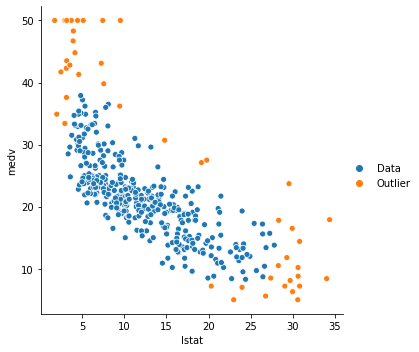

In [22]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
if_pred = clf.fit_predict(data[['lstat','medv']])

sns.relplot(x='lstat', y='medv', hue=np.where(if_pred<0,'Outlier','Data'), data=data)
plt.show()

#### Missing values

In [23]:
# Checking for null values

boston_no_outliers.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [24]:
"""
Choosing to check:
crim - per capita crime rate by town
rm - average number of rooms per dwelling
"""

'\nChoosing to check:\ncrim - per capita crime rate by town\nrm - average number of rooms per dwelling\n'

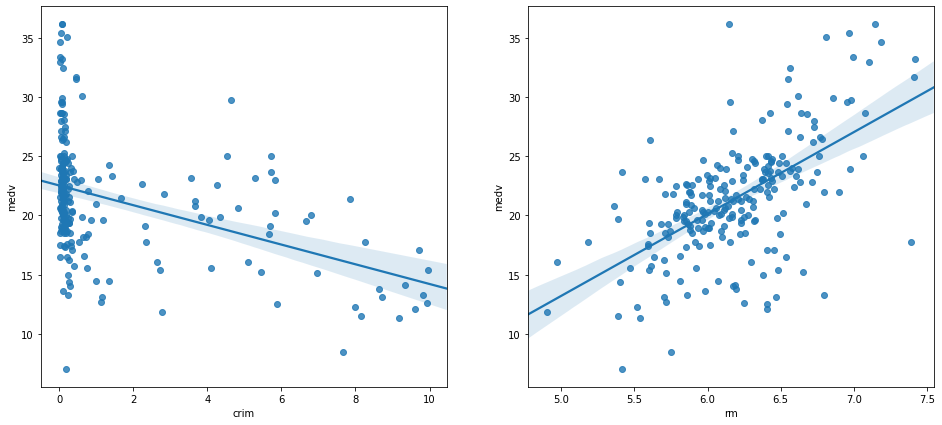

In [25]:
fig = plt.figure(1, figsize = (16,7))

ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x = "crim", y = "medv", data=boston_no_outliers)

ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = "rm", y = "medv", data=boston_no_outliers)

plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [26]:
# Your response here

"""
It makes sense that when crim is higher, medv is lower, since crim stands for crime rate by town per capita.
It also makes sense that when rm is higher, medv is also higher, since rm stands for average number of rooms per dwelling.
"""

'\nIt makes sense that when crim is higher, medv is lower, since crim stands for crime rate by town per capita.\nIt also makes sense that when rm is higher, medv is also higher, since rm stands for average number of rooms per dwelling.\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

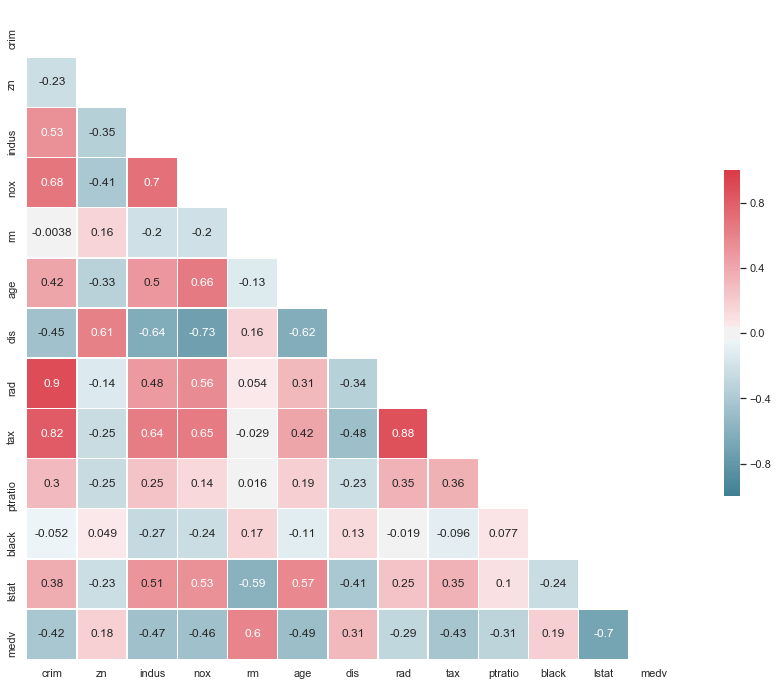

In [27]:
# Your response here

# Excluding chas from the set as it only has 0 values

boston_no_outliers_no_chas = boston_no_outliers.drop('chas', axis = 1)

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(boston_no_outliers_no_chas.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(boston_no_outliers_no_chas.corr(), mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

plt.show()

In [28]:
"""
Other variables that have high correlation with medv are: indus, nox, age, tax, lstat 
"""

'\nOther variables that have high correlation with medv are: indus, nox, age, tax, lstat \n'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [29]:
# Your code here

print(f'main statistics of price:\n{round(boston_no_outliers.medv.describe(), 2)}')
print(f'\nmedian value of price: {boston_no_outliers.medv.median()}')

main statistics of price:
count    228.00
mean      21.41
std        4.97
min        7.00
25%       18.78
50%       21.20
75%       23.83
max       36.20
Name: medv, dtype: float64

median value of price: 21.2


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [30]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [31]:
X = boston_no_outliers.drop(columns=['medv'])
y = boston_no_outliers['medv']

In [32]:
# Your code here

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [33]:
from sklearn.ensemble import RandomForestRegressor

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [34]:
# Five separate RFR here with the given max depths


rfr2 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, max_depth = 2)
rfr4 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, max_depth = 4)
rfr6 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, max_depth = 6)
rfr8 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, max_depth = 8)
rfr10 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, max_depth = 10)

Now, plot the score for each tree on the training set and on the testing set.

In [35]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

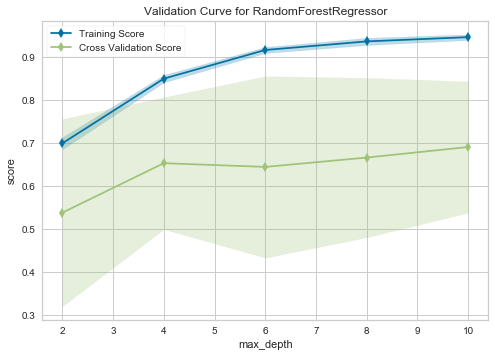

In [36]:
# Produce a plot with the score for the testing and training for the different max depths

from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(2, 12, 2), cv=10, scoring="r2"
)

viz.fit(X, y)
viz.show()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [37]:
# Your response here

"""
We have a very big deviation between the results of the cross-validation scores, from a bit higher than 0.3 to up to 0.75.
After depth 4, it seems that our model starts to overfit because the cross-validation score line is starting to go further 
away from the training score line.
"""

'\nWe have a very big deviation between the results of the cross-validation scores, from a bit higher than 0.4 to up to 0.75.\nAfter depth 8, it seems that our model\xa0starts to overfit because the cross-validation score line is starting to go further \naway from the training score line.\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [38]:
# Your response here

"""
A complicated model (maximum depth 10) has low bias and high variance. 
Model with maximum depth 1 has high bias and low variance. 
The bias-variance tradeoff depends on the depth of the tree.
"""

'\nA complicated model (maximum depth 10) has low bias and high variance. \nModel with maximum depth 1 has high bias and low variance. \nThe bias-variance tradeoff depends on the depth of the tree.\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [39]:
# Your response here

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [4,6,8,10,12]}

grid = GridSearchCV(RandomForestRegressor(), param_grid, verbose=1, cv=5, n_jobs=-1)                 
grid.fit(X_train, y_train)  

print(grid.best_params_)
print(grid.best_score_)

print(f'The best {grid.best_params_}, with the score of {grid.best_score_}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'max_depth': 8}
0.7682461107610338
The best {'max_depth': 8}, with the score of 0.7682461107610338


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.8s finished


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [40]:
# Your response here

"""
- How relevant today is data that was collected from 1978?
I would say it has very little relevance to the housing market these days. Some high-level insights might be taken,
but for a detailed overview that we could act on, we would need to work with the recent data.

- Are the features present in the data sufficient to describe a home?
We have only one feature that is specifically talking about the house (RM - average number of rooms per dwelling), 
but regarding the housing, I think we have a good base of features. Of course, it is always a good idea to look deeper
and investigate more.

- Is the model robust enough to make consistent predictions?
At the moment not, as seen fron the validation curve which has a very high deviation.

- Would data collected in an urban city like Boston be applicable in a rural city?
I would say no, the values, even of the same feature, might be very different and have a different weight on the
outcome. The model would need to be trained with more and different data.
"""